In [20]:
import time
import gc
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold

In [22]:
data_train = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Datasets/bank-full-transformed.csv')

In [23]:
data_train.age = np.log(data_train.age)

def encode(data_train, col):
    return pd.concat([data_train, pd.get_dummies(col, prefix=col.name)], axis=1)

data_train = encode(data_train, data_train.job)
data_train = encode(data_train, data_train.marital)
data_train = encode(data_train, data_train.education)
data_train = encode(data_train, data_train.month)

data_train.drop(['job', 'month', "marital", "education"], axis=1, inplace=True)

In [24]:
data_x = data_train.iloc[:, :-1]
data_y = data_train["y"]

In [25]:
print("shape of y:", data_y.shape)

shape of y: (45190,)


In [26]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36152, 40) (9038, 40) (36152,) (9038,)


In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [29]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [30]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(y_test, predictions))
print("Relatório de classificação: \n",classification_report(y_test, predictions))

Accuracy :  0.8664527550342996
Confusion Matrix : 
 [[7648  341]
 [ 866  183]]
Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7989
           1       0.35      0.17      0.23      1049

    accuracy                           0.87      9038
   macro avg       0.62      0.57      0.58      9038
weighted avg       0.83      0.87      0.85      9038



In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8514051781367559

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7989
           1       0.35      0.17      0.23      1049

    accuracy                           0.87      9038
   macro avg       0.62      0.57      0.58      9038
weighted avg       0.83      0.87      0.85      9038



In [34]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8098030537729586

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7989
           1       0.35      0.17      0.23      1049

    accuracy                           0.87      9038
   macro avg       0.62      0.57      0.58      9038
weighted avg       0.83      0.87      0.85      9038



In [36]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)
logisticregression.score(X_test, y_test)

0.8664527550342996

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8486390794423545

[[7648  341]
 [ 866  183]]


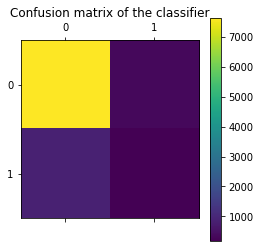

In [38]:
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()